<a href="https://colab.research.google.com/github/ramabhinav2001/ML_HW3/blob/main/TitanicUsingDT%26RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 4

1.) The data pre-processing is critical for improving the quality of data for analysis or machine learning. Cleaning, normalisation, and transformation are actions that are performed to remove errors, reduce noise, and make the data more suited for accurate and reliable modeling. Here I have dropped Name, Ticket, Fare and Cabin columns which does not contribute to the model. This process is called as data cleaning.I also detcted outliers of the given data which can degrade the performance of the model and removed them from the training and testing data.

In [504]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from collections import Counter
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.feature_selection import VarianceThreshold,SelectKBest,chi2,SelectFromModel,RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_val_score,train_test_split

In [505]:
#Data analysis
# Reading data from the given dataset
data=pd.read_csv("/content/train.csv")
data_test=pd.read_csv("/content/test.csv")
data_s=pd.read_csv("/content/gender_submission.csv")
#Training data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [506]:
#Test data
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [507]:
#Survived data
data_s.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [508]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [509]:
# Missing data in training set by columns
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [510]:
# Missing data in test set by columns
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [511]:
# Categorical Values
# Value counts of the sex column
data['Sex'].value_counts(dropna = False)
"""There are more male passengers than female passengers on titanic, but more priority was given to
female passengers during evacuation"""

'There are more male passengers than female passengers on titanic, but more priority was given to\nfemale passengers during evacuation'

In [512]:
# Mean of survival by sex
data[['Sex', 'Survived']].groupby('Sex', as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

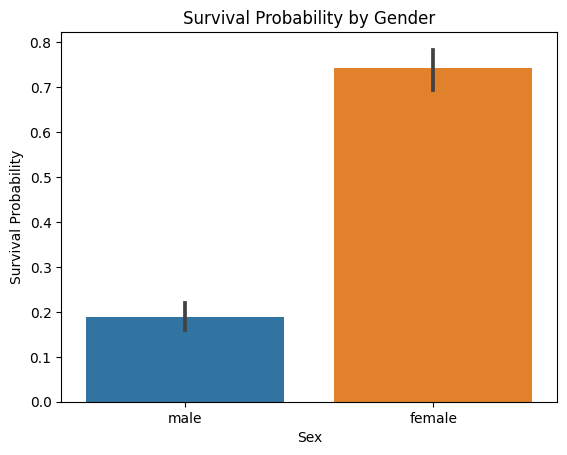

In [513]:
# Survival Probability
sns.barplot(x = 'Sex', y ='Survived', data = data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

In [514]:
# Value counts of the Pclass column
data['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [515]:
# Mean of survival by passenger class
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

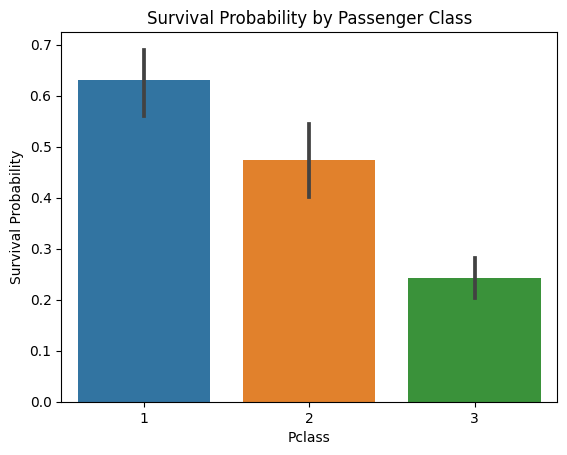

In [516]:
sns.barplot(x = 'Pclass', y ='Survived', data = data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')
# Survival probability decrease with passenger class, that is pc1>pc2>pc3

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

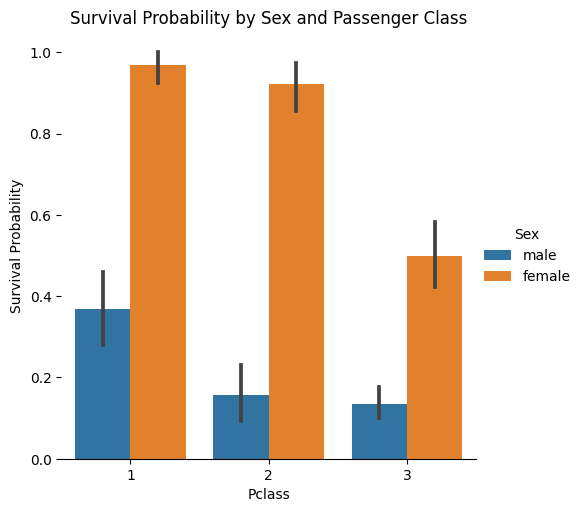

In [517]:
# Survival by gender and passenger class
g = sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = data, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

In [518]:
# Value counts of the Embarked column
data['Embarked'].value_counts(dropna = False)
#Two missing values in the Embarked column

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [519]:
# Mean of survival by point of embarkation
data[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

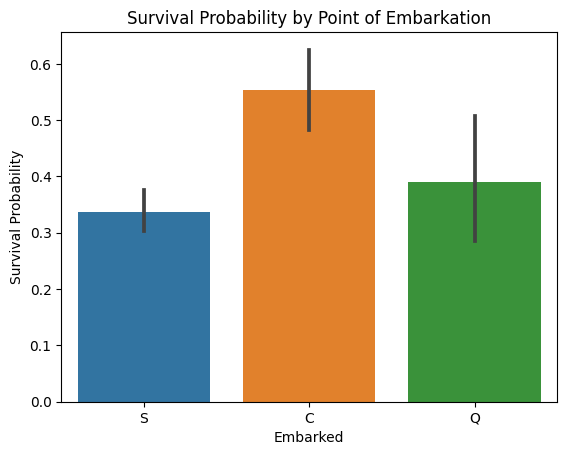

In [520]:
sns.barplot(x = 'Embarked', y ='Survived', data = data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

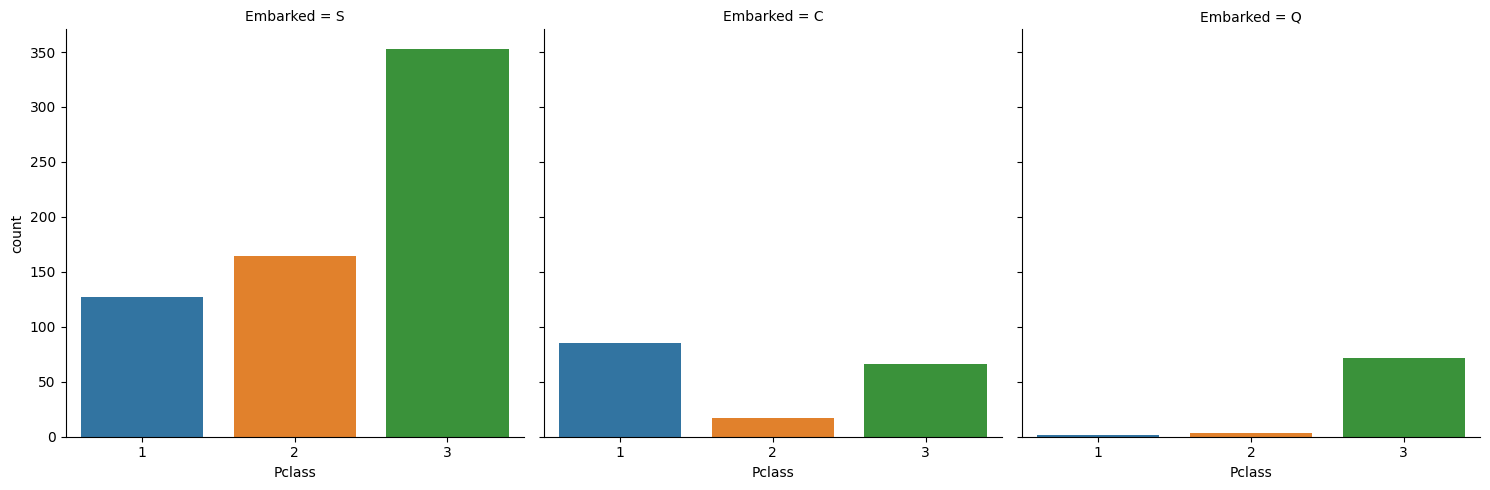

In [521]:
# Locations C and S have the highest and lowest survival probabilities, respectively.
sns.catplot(x='Pclass', col = 'Embarked', data = data,kind='count')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


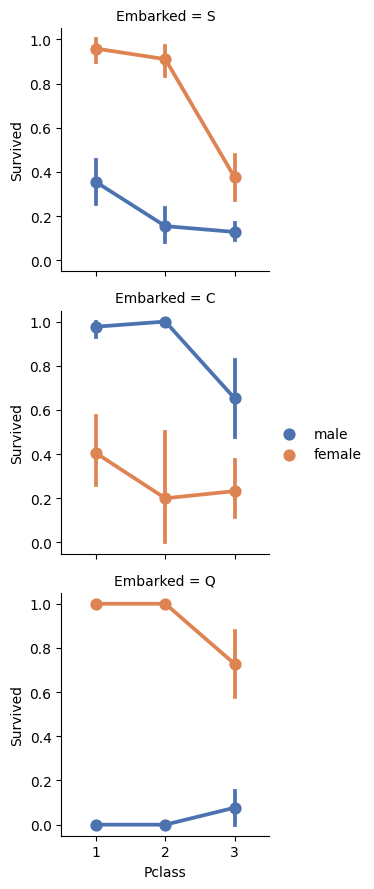

In [522]:
# Survival probability by all categorical variables
grid = sns.FacetGrid(data, row = 'Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

In [523]:
# Detect and remove outliers in numerical variables
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers

outliers_to_drop = detect_outliers(data, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
outliers_to_drop = detect_outliers(data_test, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 0 indices:  []


In [524]:
# Outliers in numerical variables
data.loc[outliers_to_drop, :]
data_test.loc[outliers_to_drop, :]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [525]:
# Drop outliers and reset index
print("Before: {} rows".format(len(data)))
data = data.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(data)))

Before: 891 rows
After: 891 rows


In [526]:
#Pre-processing of the given dataset
#Dropping columns which doesn't contribute to the prediction and the parameter inplace true will change the table
data.drop(["Name","Ticket","Fare","Cabin"], axis=1,inplace=True)
print(data.head())
data_test.drop(["Name","Ticket","Fare","Cabin"], axis=1,inplace=True)
print(data_test.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch Embarked
0            1         0       3    male  22.0      1      0        S
1            2         1       1  female  38.0      1      0        C
2            3         1       3  female  26.0      0      0        S
3            4         1       1  female  35.0      1      0        S
4            5         0       3    male  35.0      0      0        S
   PassengerId  Pclass     Sex   Age  SibSp  Parch Embarked
0          892       3    male  34.5      0      0        Q
1          893       3  female  47.0      1      0        S
2          894       2    male  62.0      0      0        Q
3          895       3    male  27.0      0      0        S
4          896       3  female  22.0      1      1        S


2.) Selecting a feature is important for efficiently analyzing datasets. When we Categorize variables into numerical values for columns like "Age" and "Fare" given in the training dataset and categorical values for columns like "Sex" assists in analyzing the given dataset for better output prediction and accuracy. The numerical variables present in integer type columns provide continuous data for statistical analysis, whereas categorical variables, which lack basic order, require alternative procedures. Here,I also used variance threshold for feature selection to eliminate low-variance features that have less variation in their values.




<ipython-input-527-5adf5c6c8022>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap='coolwarm')


<Axes: >

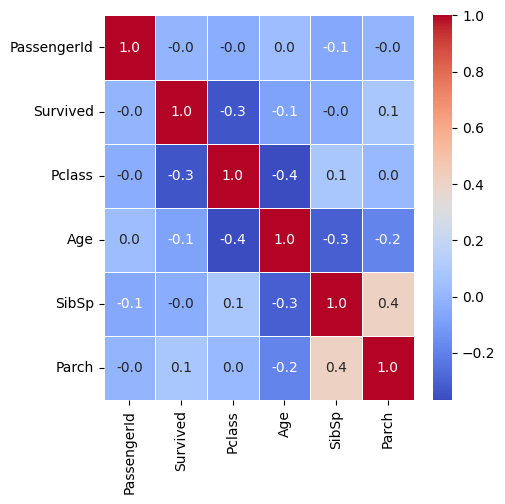

In [527]:
#Heatmap for train dataset
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap='coolwarm')

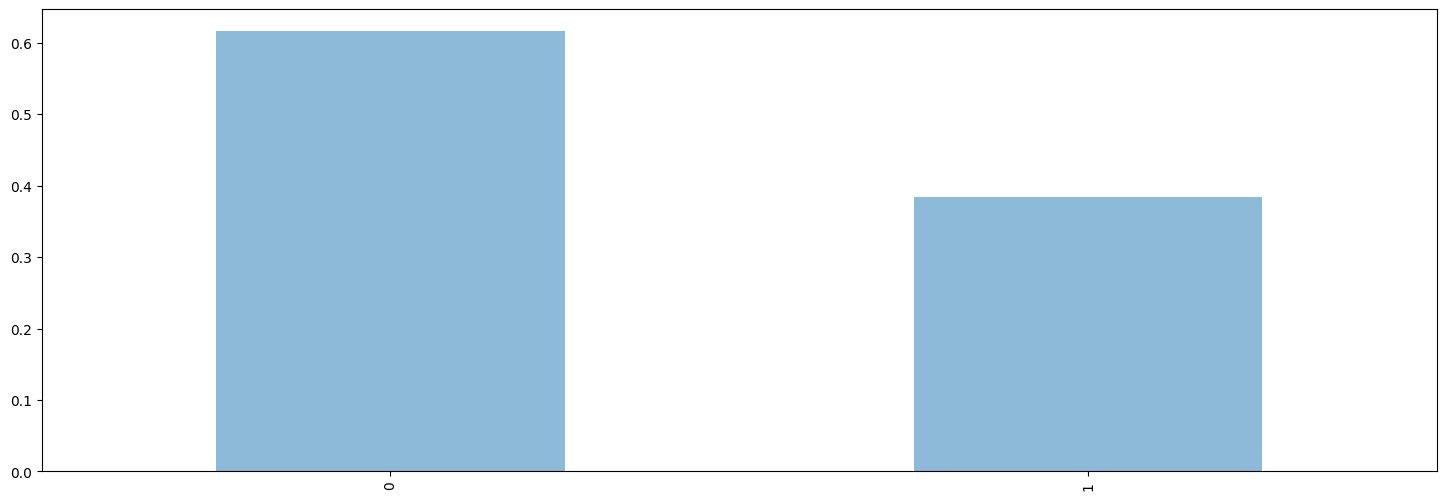

In [528]:
# How many people survived or not according to the training data... %40 percent survived,%60 percent died
fig = plt.figure(figsize=(18,6))
data.Survived.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.show()

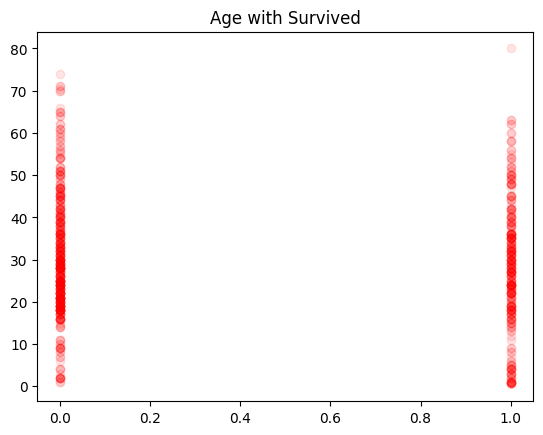

In [529]:
#Age with survived
plt.scatter(data.Survived, data.Age, alpha=0.1,c='red')
plt.title("Age with Survived")
plt.show()

In [530]:
# To define X without survived column
#By default inplace parameter is set as "False" and doesn't change the table
X_train = data.drop(["Survived"],axis="columns")
# For Y, we use column survived
Y_train = data["Survived"]
print(X_train)
print(Y_train)

     PassengerId  Pclass     Sex   Age  SibSp  Parch Embarked
0              1       3    male  22.0      1      0        S
1              2       1  female  38.0      1      0        C
2              3       3  female  26.0      0      0        S
3              4       1  female  35.0      1      0        S
4              5       3    male  35.0      0      0        S
..           ...     ...     ...   ...    ...    ...      ...
886          887       2    male  27.0      0      0        S
887          888       1  female  19.0      0      0        S
888          889       3  female   NaN      1      2        S
889          890       1    male  26.0      0      0        C
890          891       3    male  32.0      0      0        Q

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [531]:
#Making Male = 0 & Female = 1, this allows us to analyze the table only with numerical values
#Making Embarked data which contains locations and we convert them to integers like S=0,C=1,Q=2
X_train=data
X_train.Sex = data.Sex.map({"male":0,"female":1})
X_train.Embarked = data.Embarked.map({'S':0,'C':1,'Q':2})
print(X_train.head())
X_test=data_test
X_test.Sex=X_test.Sex.map({"male":0,"female":1})
X_test.Embarked = data_test.Embarked.map({'S':0,'C':1,'Q':2})
print(X_test)

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Embarked
0            1         0       3    0  22.0      1      0       0.0
1            2         1       1    1  38.0      1      0       1.0
2            3         1       3    1  26.0      0      0       0.0
3            4         1       1    1  35.0      1      0       0.0
4            5         0       3    0  35.0      0      0       0.0
     PassengerId  Pclass  Sex   Age  SibSp  Parch  Embarked
0            892       3    0  34.5      0      0         2
1            893       3    1  47.0      1      0         0
2            894       2    0  62.0      0      0         2
3            895       3    0  27.0      0      0         0
4            896       3    1  22.0      1      1         0
..           ...     ...  ...   ...    ...    ...       ...
413         1305       3    0   NaN      0      0         0
414         1306       1    1  39.0      0      0         1
415         1307       3    0  38.5      0      0   

In [532]:
#Number of null data values
no_of_nulls1=X_train.Age.isnull().sum()
print(no_of_nulls1)
no_of_nulls2=X_test.Age.isnull().sum()
print(no_of_nulls2)

177
86


In [533]:
#Replacing null values by inserting average value
X_train.Age = data.Age.fillna(X_train.Age.mean())
no_of_nulls1=data.Age.isnull().sum()
print(no_of_nulls1)
X_test.Age = X_test.Age.fillna(X_test.Age.mean())
no_of_nulls2=X_test.Age.isnull().sum()
print(no_of_nulls2)

0
0


In [534]:
print(X_test.isnull().sum())
print(X_train.isnull().sum())
X_train.Embarked = X_train.Embarked.interpolate().astype(int)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
dtype: int64


In [535]:
#variance threshold for feature selection
mdlsel = VarianceThreshold(threshold=0.5)
mdlsel.fit(data)
ix = mdlsel.get_support()
data1 = pd.DataFrame(mdlsel.transform(data), columns = data.columns.values[ix])
data1.head()

,PassengerId,Pclass,Age,SibSp,Parch
0,1.0,3.0,22.0,1.0,0.0
1,2.0,1.0,38.0,1.0,0.0
2,3.0,3.0,26.0,0.0,0.0
3,4.0,1.0,35.0,1.0,0.0
4,5.0,3.0,35.0,0.0,0.0


In [536]:
#Select K best for feature selection
X = data.drop("Survived",axis=1)
y = data["Survived"]
mdlsel = SelectKBest(chi2, k=5)
mdlsel.fit(X,y)
ix = mdlsel.get_support()
data2 = pd.DataFrame(mdlsel.transform(X), columns = X.columns.values[ix]) # en iyi leri aldi... 7 tane...
data2.head(n=5)

,Pclass,Sex,Age,Parch,Embarked
0,3.0,0.0,22.0,0.0,0.0
1,1.0,1.0,38.0,0.0,1.0
2,3.0,1.0,26.0,0.0,0.0
3,1.0,1.0,35.0,0.0,0.0
4,3.0,0.0,35.0,0.0,0.0


In [537]:
#Applying logistic regression using Select from model for feature selection
X = data.drop("Survived",axis=1)
y = data["Survived"]

# Linear Model
linmdl = LogisticRegression()
linmdl.fit(X,y)
mdl = SelectFromModel(linmdl,prefit=True)
ix = mdl.get_support()
data3 = pd.DataFrame(mdl.transform(X), columns = X.columns.values[ix])
data3.head(n=5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


,Pclass,Sex
0,3.0,0.0
1,1.0,1.0
2,3.0,1.0
3,1.0,1.0
4,3.0,0.0


In [538]:
#last feature selection
mdl = RFE(linmdl,n_features_to_select=5)
mdl.fit(X,y)
ix = mdl.get_support()

data4 = pd.DataFrame(mdl.transform(X), columns = X.columns.values[ix])
data4.head(n=5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Pclass,Sex,SibSp,Parch,Embarked
0,3.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,0.0,1.0
2,3.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0


In [539]:
X_train = data.drop('Survived', axis = 1)
Y_train = data['Survived']
#length of training and testing in variable X:
print(len(X_train))
print(len(X_test))
print(X_test)
print(X_train)

891
418
     PassengerId  Pclass  Sex       Age  SibSp  Parch  Embarked
0            892       3    0  34.50000      0      0         2
1            893       3    1  47.00000      1      0         0
2            894       2    0  62.00000      0      0         2
3            895       3    0  27.00000      0      0         0
4            896       3    1  22.00000      1      1         0
..           ...     ...  ...       ...    ...    ...       ...
413         1305       3    0  30.27259      0      0         0
414         1306       1    1  39.00000      0      0         1
415         1307       3    0  38.50000      0      0         0
416         1308       3    0  30.27259      0      0         0
417         1309       3    0  30.27259      1      1         1

[418 rows x 7 columns]
     PassengerId  Pclass  Sex        Age  SibSp  Parch  Embarked
0              1       3    0  22.000000      1      0         0
1              2       1    1  38.000000      1      0         1
2    

3.)Plotting Decision Tree using DecisionTreeClassifier

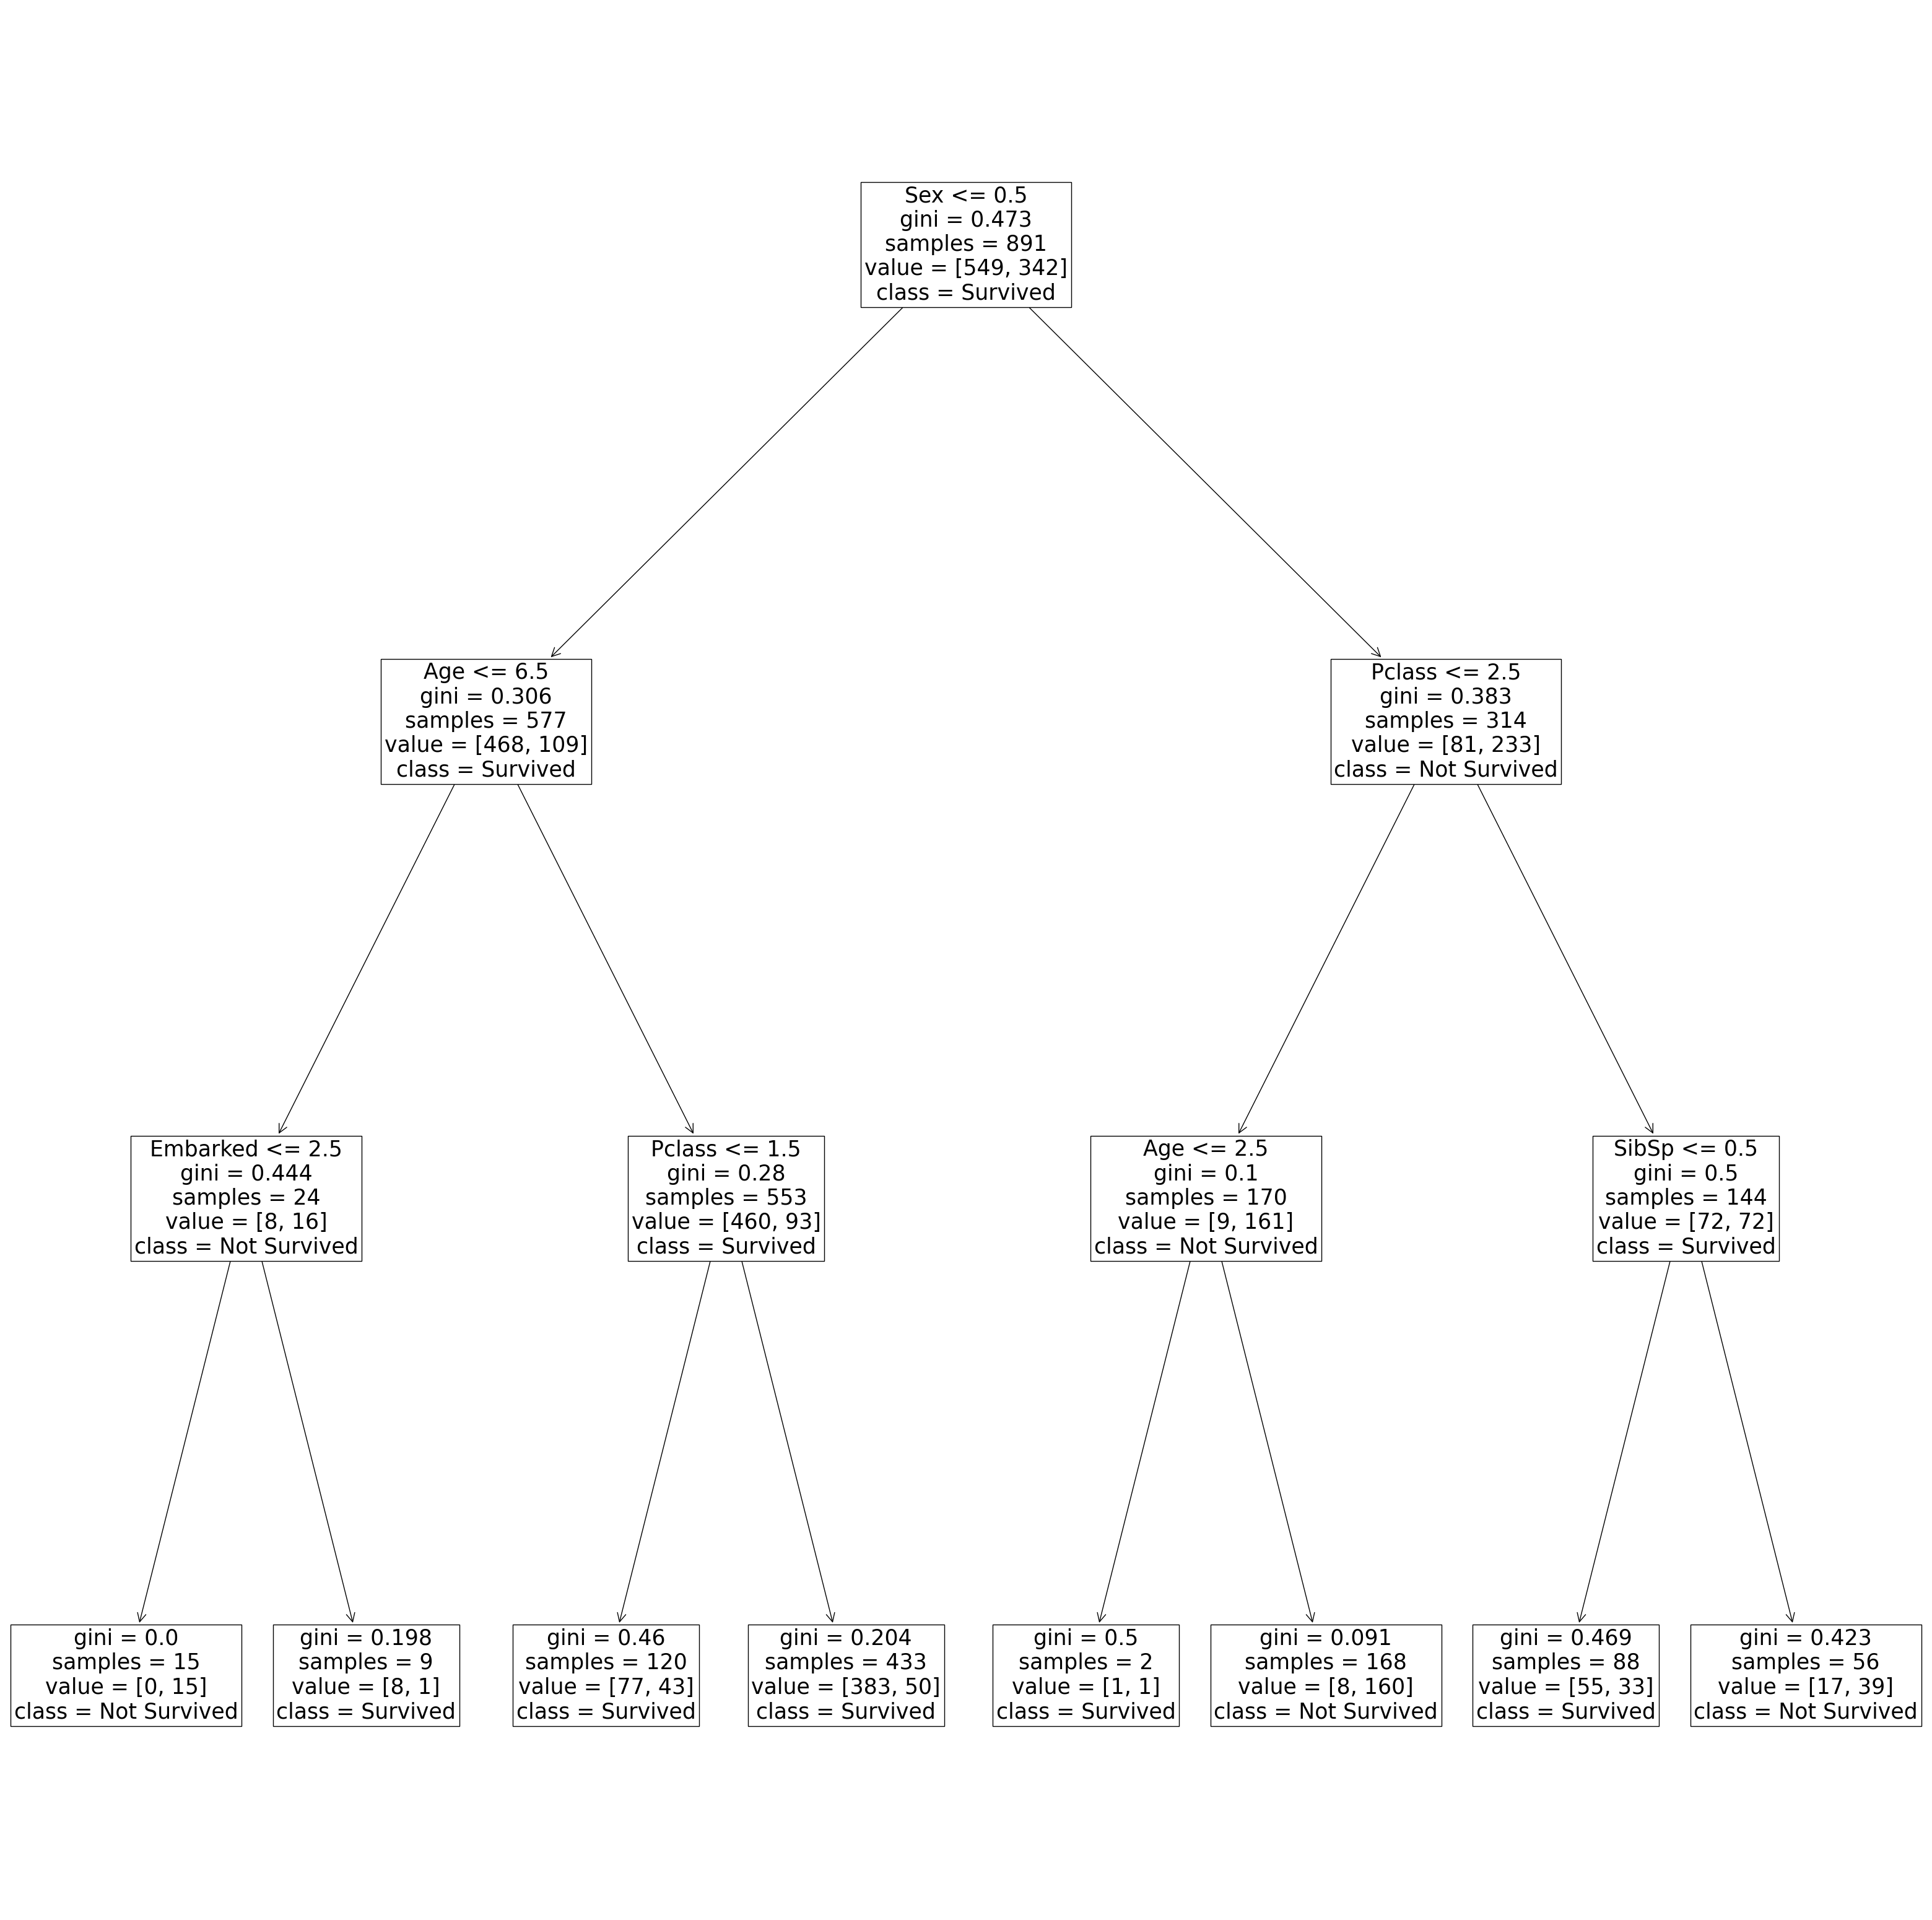

In [540]:
#Decision Tree model and plotting the decision tree with a depth=3
dt=DecisionTreeClassifier(max_depth=3)
#training the model
dt.fit(X_train,Y_train)
#predicted model to test the real model
dt_Y_pred= dt.predict(X_test)
plt.figure(figsize=(40,40))
graph_tree = plot_tree (dt,feature_names = ['PassengerId','Pclass','Sex','Age','Embarked','Parch','SibSp'],
                        class_names = ['Survived','Not Survived'],
                        fontsize = 25)

In [549]:
#Output for individuals who had survived or not
cl_val = dt.predict(data_test)
cl_data = pd.DataFrame({"PassengerId":data_test['PassengerId'],"Survived":cl_val})
print(cl_data)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


4.)The five-fold cross validation of fine-tuned decision tree learning model and average classification accuracy.

In [541]:
#Five-fold cross validation of Decision Tree model
dt_kf = KFold(n_splits=5,shuffle=True) #splits into 5 folds where 4 is for traing and one for testing
dt_cv = cross_val_score(dt, X_train, Y_train, cv=dt_kf)
print("Average Classification Accuracy using Decision Tree:",np.mean(dt_cv))


Average Classification Accuracy using Decision Tree: 0.8170736300295023


5.)five-fold cross validation of fine-tuned random forest learning  model and average classification accuracy.

In [542]:
#Random forrest tree model
rf = RandomForestClassifier(n_estimators = 100).fit(X_train,Y_train)
rf_kf=KFold(n_splits=5,shuffle=True)
rf_Y_pred = rf.predict(X_test)
rf_cv=cross_val_score(rf, X_train, Y_train, cv=rf_kf)
print("Average Classification Accuracy using Decision Tree:",np.mean(rf_cv))

Average Classification Accuracy using Decision Tree: 0.7934530161320696


6.)Random forest is better than decision tree.

7.)We observe that pre-processing data and choosing the necessary features allows us to build our model
with efficiency and much better accuracy.
We also observe that Accuracy of random tree is greater than the accuracy of decision tree.
Therefore when compared to a single decision tree, random forests often offer more generalization
and robustness due to ensembling, which resulted in improved accuracy and also determined which passengers survived.

#Question 5

In [543]:
# 5.)Bagging classifier
# Build Bagging Classifier with Decision Tree base estimator
base_est= DecisionTreeClassifier(max_depth=3)
bc = BaggingClassifier(estimator=base_est,n_estimators=5, random_state=0)
bc.fit(X_train, Y_train)
print(bc.score(X_train,Y_train))
# Predict and evaluate
bc_Y_pred = bc.predict(X_test)
pred_df_bc = pd.DataFrame({'PassengerId': data_test['PassengerId'], 'Survived': bc_Y_pred})
print("Bagging Classifier output:",pred_df_bc)

0.8372615039281706
Bagging Classifier output:      PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [544]:
# 5.)Bagging classifier
# Build Bagging Classifier with Random Forest Tree base estimator
base_est= RandomForestClassifier(n_estimators = 1)
bc = BaggingClassifier(estimator=base_est,n_estimators=5, random_state=0)
bc.fit(X_train, Y_train)
print(bc.score(X_train,Y_train))
# Predict and evaluate
bc_Y_pred = bc.predict(X_test)
pred_df_bc = pd.DataFrame({'PassengerId': data_test['PassengerId'], 'Survived': bc_Y_pred})
print("Bagging Classifier output:",pred_df_bc)

0.9113355780022446
Bagging Classifier output:      PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


#Question 6

In [545]:
# 6.)Adaboost Classifier
# Build Adaboost Classifier with Decision Tree base estimator
base_est= DecisionTreeClassifier(max_depth=3)
ab = AdaBoostClassifier(estimator=base_est,learning_rate=1.0,n_estimators=5)
ab.fit(X_train,Y_train)
print(ab.score(X_train,Y_train))
# Predict and evaluate
ab_Y_pred = ab.predict(X_test)
pred_df_ab= pd.DataFrame({'PassengerId': data_test['PassengerId'], 'Survived': ab_Y_pred})
print("Adaboost Classifier Output:",pred_df_ab)

0.8507295173961841
Adaboost Classifier Output:      PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [546]:
# 6.)Adaboost Classifier
# Build Adaboost Classifier with Random Forest Tree base estimator
base_est= RandomForestClassifier(n_estimators=1)
ab = AdaBoostClassifier(estimator=base_est,learning_rate=1.0,n_estimators=5)
ab.fit(X_train,Y_train)
print(ab.score(X_train,Y_train))
# Predict and evaluate
ab_Y_pred = ab.predict(X_test)
pred_df_ab= pd.DataFrame({'PassengerId': data_test['PassengerId'], 'Survived': ab_Y_pred})
print("Adaboost Classifier Output:",pred_df_ab)

0.9652076318742986
Adaboost Classifier Output:      PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
